In [38]:
from spatial_models import *
from spatial_indicators import *
from spatial_plotting import *

from IPython.display import HTML

In [39]:
model = LocalFacilitationModel(size=64)
b = np.arange(1, 0.25, -0.01)

# Load Simulation Results

In [40]:
load = True  # set to True to load previous simulation results

if load:
    data = load_data('Results/local_facilitation_model.dat')
    snapshots1, snapshots2, snapshots3, snapshots4, snapshots5, snapshots6, snapshots7, snapshots8 = data

# Parameter Change

In [41]:
if not load:
    snapshots1 = parameter_change(model, b, "b", time_steps=100)

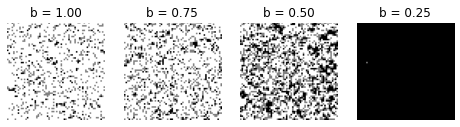

In [42]:
plot_snapshots(snapshots1, [1, 0.75, 0.5, 0.25], "b", vmin=-1, vmax=1, precision=2)

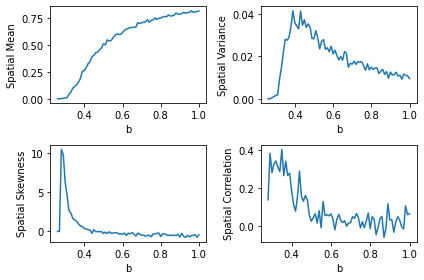

In [43]:
spatial_indicator_grid(model.vegetation_cover(snapshots1), "b")

# Duration of Run

## $b=0.55$

In [44]:
model.b = 0.55
time_steps = 400

In [45]:
if not load:
    snapshots2 = simulate_time_steps(model, time_steps, *model.initialisation())

In [46]:
HTML(animate_snapshots(snapshots2, vmin=-1, vmax=1, step=4).to_jshtml())

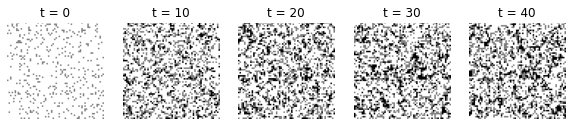

In [47]:
plot_snapshots(snapshots2, [0, 10, 20, 30, 40], "t", vmin=-1, vmax=1, precision=0)

## $b=0.4$

In [48]:
model.b = 0.4

In [49]:
if not load:
    snapshots3 = simulate_time_steps(model, time_steps, *model.initialisation())

In [50]:
HTML(animate_snapshots(snapshots3, vmin=-1, vmax=1, step=4).to_jshtml())

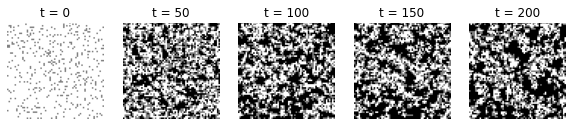

In [51]:
plot_snapshots(snapshots3, [0, 50, 100, 150, 200], "t", vmin=-1, vmax=1, precision=0)

## $b=0.25$

In [52]:
model.b = 0.25

In [53]:
if not load:
    snapshots4 = simulate_time_steps(model, time_steps, *model.initialisation())

In [54]:
HTML(animate_snapshots(snapshots4, vmin=-1, vmax=1, step=4).to_jshtml())

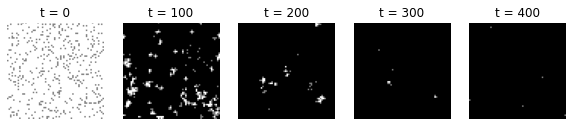

In [55]:
plot_snapshots(snapshots4, [0, 100, 200, 300, 400], "t", vmin=-1, vmax=1, precision=0)

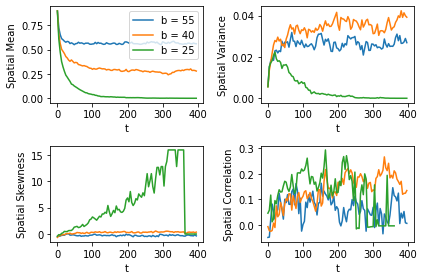

In [56]:
spatial_indicator_grid([model.vegetation_cover(snapshots) for snapshots in [snapshots2, snapshots3, snapshots4]], "t", n=4, levels=[55, 40, 25], level_name="b")

## Observations

I simulated the model for a number of time steps at a few levels of $b$. At $b=55$, the system settles to the equilibrium relatively quickly. At $b=40$, nearer the tipping point, the system takes longer to settle to a lower equilibrium. At $b=25$, past the tipping point, the system goes to zero vegetation.

The spatial variance, spatial skewness and spatial correlation are slightly higher for $b=40$ than $b=55$, as $b=40$ is closer to the critical transition then $b=55$.

For $b=25$, spatial variance initially increases as the system goes from fully vegetated to partially vegetated, then decreases to zero as the system becomes more fully unvegetated. Spatial skewness increases due to the patches decreasing in size and number, then sharply goes to zero as the system becomes completely unvegetated with no patches. Spatial correlation increases due to formation of patches then goes to zero as the patches disappear.



# Effect of Preventive Measures

I simulated the effect of reducing the mortality probability when the aridity reaches a certain value to see if it can prevent desertification. Mortality of plants can be due to natural mortality or grazing. Since there will always be natural mortality I assume a minimum mortality probability of 0.05.

In [57]:
m0 = 0.1
dm = [0, -0.00001, -0.0001, -0.001]
m_bounds = (0.05, None)

## $\frac{db}{dt}=-0.0001$

In [58]:
db = -0.0001
time_steps = 1000

### Preventive Measures at $b=0.4$

In [59]:
b0 = 0.45

f = lambda t : b0 + t*db
g = lambda b : (b - b0)/db

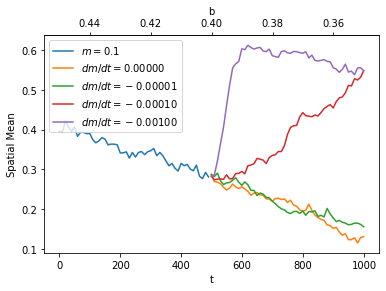

In [60]:
if not load:
    snapshots5 = preventive_measure(model, time_steps, b0, db, m0, dm, "b", "m", 0.4, b_bounds=m_bounds)
    snapshots5 = [snapshots.iloc[::10] for snapshots in snapshots5]

fig, ax = plt.subplots()

ax2 = ax.secondary_xaxis("top", functions=(f,g))
ax2.set_xlabel("b")

for snapshots in snapshots5:
    plot_spatial_indicator(ax, model.vegetation_cover(snapshots), "mean", "t")

ax.legend([r"$m=0.1$"] + [fr"$dm/dt={dm_step:.5f}$" for dm_step in dm])

### Preventive Measures at $b=0.3$

In [61]:
b0 = 0.35

f = lambda t : b0 + t*db
g = lambda b : (b - b0)/db

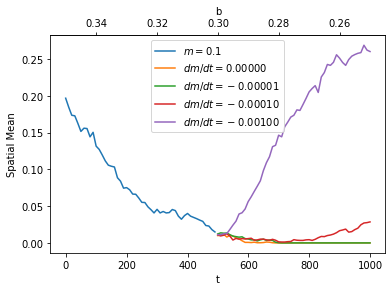

In [62]:
if not load:
    snapshots6 = preventive_measure(model, time_steps, b0, db, m0, dm, "b", "m", 0.3, b_bounds=m_bounds)
    snapshots6 = [snapshots.iloc[::10] for snapshots in snapshots6]

fig, ax = plt.subplots()

ax2 = ax.secondary_xaxis("top", functions=(f,g))
ax2.set_xlabel("b")

for snapshots in snapshots6:
    plot_spatial_indicator(ax, model.vegetation_cover(snapshots), "mean", "t")

ax.legend([r"$m=0.1$"] + [fr"$dm/dt={dm_step:.5f}$" for dm_step in dm])

## $\frac{db}{dt}=-0.001$

In [63]:
db = -0.001
time_steps = 100

### Preventive Measures at $b=1.4$

In [64]:
b0 = 0.45

f = lambda t : b0 + t*db
g = lambda b : (b - b0)/db

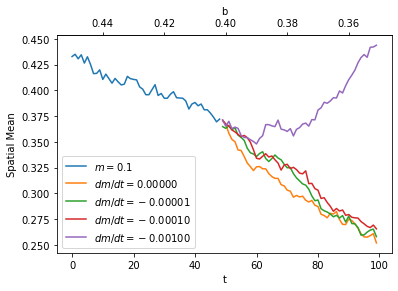

In [65]:
if not load:
    snapshots7 = preventive_measure(model, time_steps, b0, db, m0, dm, "b", "m", 0.4, b_bounds=m_bounds)

fig, ax = plt.subplots()

ax2 = ax.secondary_xaxis("top", functions=(f,g))
ax2.set_xlabel("b")

for snapshots in snapshots7:
    plot_spatial_indicator(ax, model.vegetation_cover(snapshots), "mean", "t")

ax.legend([r"$m=0.1$"] + [fr"$dm/dt={dm_step:.5f}$" for dm_step in dm])

### Preventive Measures at $b=0.3$

In [66]:
b0 = 0.35

f = lambda t : b0 + t*db
g = lambda b : (b - b0)/db

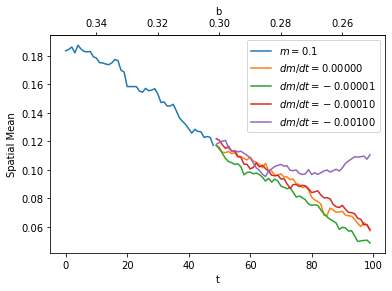

In [67]:
if not load:
    snapshots8 = preventive_measure(model, time_steps, b0, db, m0, dm, "b", "m", 0.3, b_bounds=m_bounds)

fig, ax = plt.subplots()

ax2 = ax.secondary_xaxis("top", functions=(f,g))
ax2.set_xlabel("b")

for snapshots in snapshots8:
    plot_spatial_indicator(ax, model.vegetation_cover(snapshots), "mean", "t")

ax.legend([r"$m=0.1$"] + [fr"$dm/dt={dm_step:.5f}$" for dm_step in dm])

## Observations

When the reduction of mortality probability is fast enough to overcome the increasingly harsh environment, then vegetation recovers in the system. However, if the reduction is insufficiently fast, then desertification continues.

When the decrease in aridity level is faster, then a faster reduction rate in mortality is required for the system to recover. However, the faster decrease in aridity level also means the system does not have time to settle to equilibrium and thus desertification "lags".

When the preventive measures take place just after the deterministic bifurcation point, then the mortality needs to reduce quickly as desertification is imminent.

# Linearisation

## Bifurcation

In [68]:
bifurcation = find_bifurcation(model, 1, 0, -0.1, "b", 1.e-3)
print(f"Bifurcation at b = {bifurcation:.2f}")

Bifurcation at b = 0.50


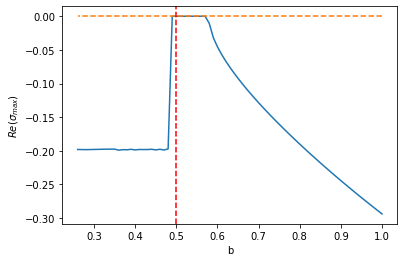

In [69]:
fig, ax = plt.subplots()
plot_max_eigenvalues(ax, model, b, "b")
ax.axvline(bifurcation, linestyle='--', color="red")

## Mean Field Approximation Model

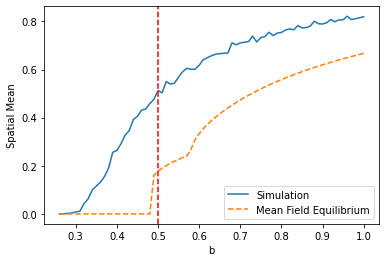

In [70]:
fig, ax = plt.subplots()
plot_spatial_indicator(ax, model.vegetation_cover(snapshots1), "mean", "b")
plot_equilibria(ax, model, b, "b")
ax.legend(["Simulation", "Mean Field Equilibrium"])
ax.axvline(bifurcation, linestyle='--', color="red")

I plotted the simulation results against the mean equilibrium calculated from the mean-field approximation model. The simulation results were significantly higher, as the mean-field approximation model does not consider local interactions between cells.

The simulation results suggest a tipping point at $b\approx0.3-0.4$ but the bifurcation found from the mean-field approximation is at $b=0.5$.

## Pair Approximation Model

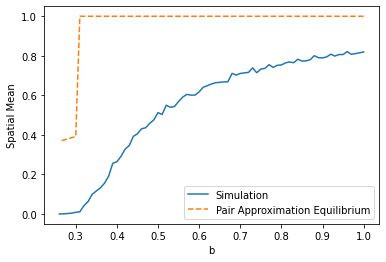

In [71]:
fig, ax = plt.subplots()
plot_spatial_indicator(ax, model.vegetation_cover(snapshots1), "mean", "b")
plot_equilibria(ax, model, b, "b", "pair")
ax.legend(["Simulation", "Pair Approximation Equilibrium"])

I plotted the simulation results against the mean equilibrium of the pair approximation model, which takes into account local interactions. However, the implementation is broken.

# Save Simulation Results

In [72]:
save = False  # set to True to save current simulation results

if save:
    data = (snapshots1, snapshots2, snapshots3, snapshots4, snapshots5, snapshots6, snapshots7, snapshots8)
    save_data('Results/local_facilitation_model.dat', data)